In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [46]:
data = pd.read_csv("drive/My Drive/Colab Notebooks/bus1234.csv")

In [47]:
data

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8260 non-null   int64  
 1   id          8260 non-null   float64
 2   group       8260 non-null   float64
 3   year        8260 non-null   float64
 4   month       8260 non-null   float64
 5   replace     8260 non-null   float64
 6   miles       8260 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 451.8 KB


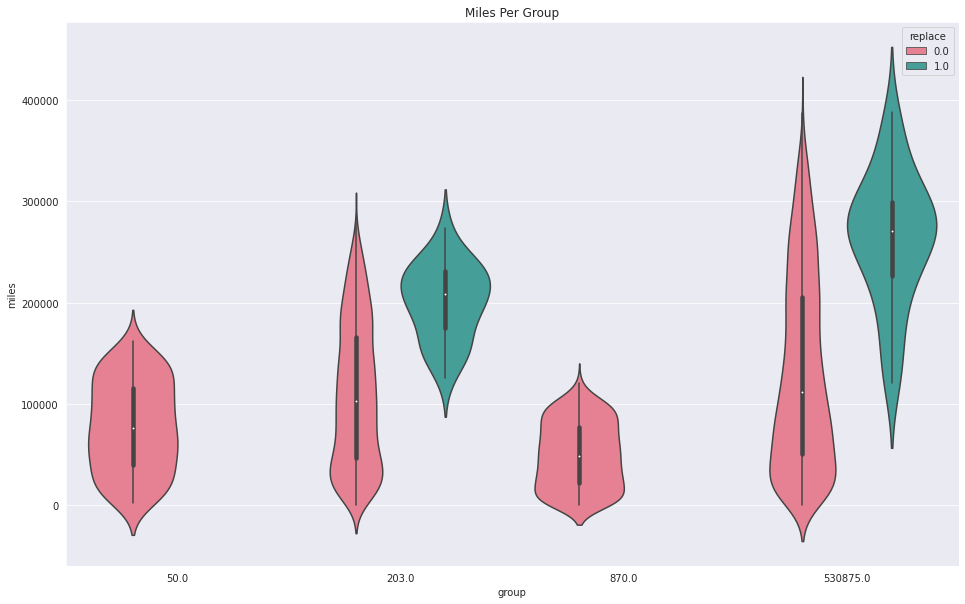

In [50]:
plt.figure(figsize=(16,10))
sns.violinplot(x=data['group'], y=data['miles'], hue=data['replace'], palette='husl')
plt.title("Miles Per Group")
plt.show()

In [52]:
data.groupby(by='year').sum()

,Unnamed: 0,id,group,month,replace,miles
year,,,,,,
1975.0,893698,11396.0,78569500.0,1554.0,0.0,956433.0
1976.0,2684646,34188.0,235708500.0,2886.0,0.0,16563156.0
1977.0,2689974,34188.0,235708500.0,2886.0,1.0,38249247.0
1978.0,2695302,34188.0,235708500.0,2886.0,2.0,57969609.0
1979.0,3142950,62868.0,235757220.0,5286.0,4.0,78481002.0
1980.0,3772422,103020.0,235825428.0,6630.0,4.0,109203289.0
1981.0,3787126,107676.0,235827028.0,6902.0,6.0,135017661.0
1982.0,3801078,110004.0,235827828.0,6942.0,13.0,146054939.0
1983.0,4262034,128604.0,235932228.0,7962.0,9.0,154940380.0


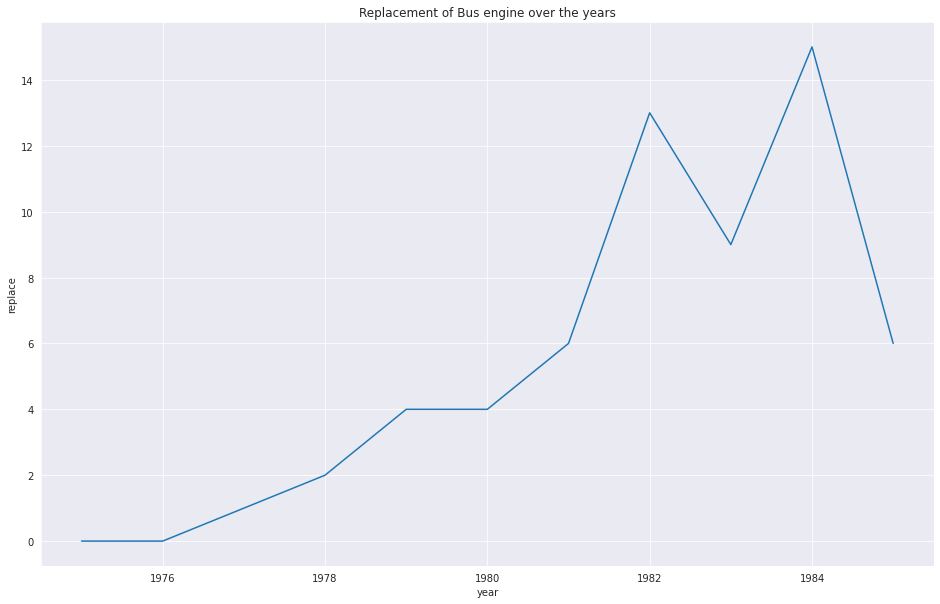

In [54]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=data.groupby(by='year').sum()['replace'])
plt.title("Replacement of Bus engine over the years")
plt.show()

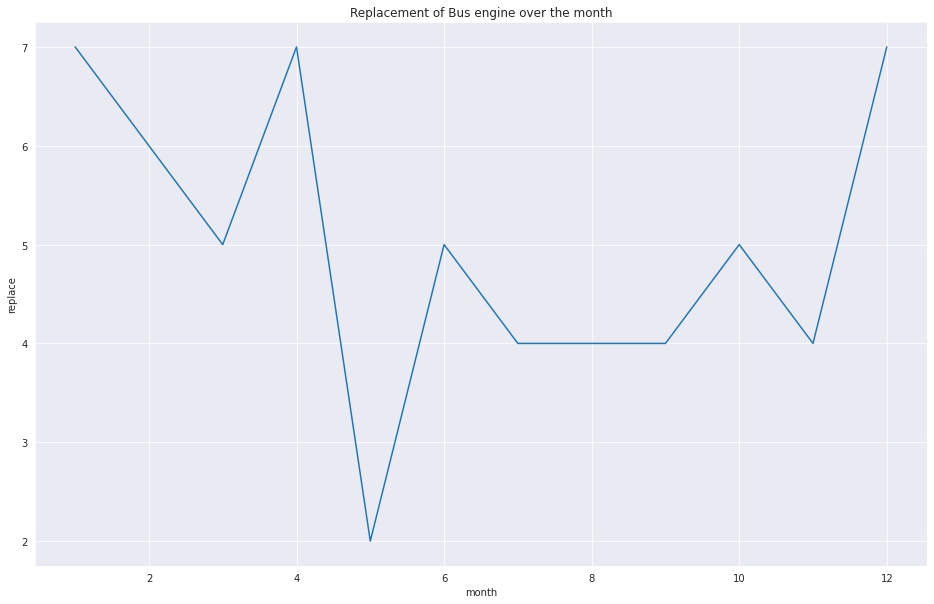

In [55]:
plt.figure(figsize=(16, 10))
sns.lineplot(data = data.groupby(by='month').sum()['replace'])
plt.title("Replacement of Bus engine over the month")
plt.show()

In [71]:
def preprocess_data(df):
  df = df.copy()
  #drop Unnamed: 0
  df = df.drop(["Unnamed: 0"], axis = 1)
  #X and y and train_test_split
  X = df.drop('replace', axis = 1)
  y = df['replace']

  X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=5, shuffle=True)


  return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train, y_test = preprocess_data(data)

In [73]:
X_train

,id,group,year,month,miles
6776,83.0,530875.0,1978.0,10.0,125373.0
7029,85.0,530875.0,1980.0,5.0,210225.0
805,104.0,203.0,1983.0,9.0,196098.0
5366,71.0,530875.0,1978.0,4.0,137754.0
4000,59.0,530875.0,1981.0,6.0,65991.0
...,...,...,...,...,...
7286,87.0,530875.0,1982.0,4.0,14142.0
3046,136.0,203.0,1983.0,10.0,192882.0
4079,60.0,530875.0,1978.0,4.0,134470.0
2254,125.0,203.0,1981.0,12.0,122241.0


In [74]:
y_train.value_counts()

0.0    5740
1.0      42
Name: replace, dtype: int64

In [86]:
nominal_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
preprocessor = ColumnTransformer(transformers=[('nominal', nominal_transformer, ['id', 'group'])], remainder='passthrough')
model = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('classifier', LogisticRegression(
    class_weight={
        0:1.0,
        1:5.0
    }))])

#### We are using class_weight in the Logistic Regression because this is a problem of class imbalance. we only have 18 samples of replecement in the test set so we are telling the model to focus 5 times more on the replacement class(1). 

In [87]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('nominal',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                     

In [88]:
model.score(X_test, y_test)

0.9838579499596449

In [89]:
print("Test accuracy is {:.2f}%".format(model.score(X_test, y_test)*100))

Test accuracy is 98.39%


In [90]:
y_pred = model.predict(X_test)

In [91]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [92]:
clr = classification_report(y_test, y_pred, target_names=['No Replacements', 'Replacements'])
print(clr)

                 precision    recall  f1-score   support

No Replacements       0.99      0.99      0.99      2460
   Replacements       0.04      0.06      0.05        18

       accuracy                           0.98      2478
      macro avg       0.52      0.52      0.52      2478
   weighted avg       0.99      0.98      0.99      2478

